# **Proyek Machine Learning: Prediksi Customer Churn**  
**Nama**: Berlian Ishma Zhafira Sujana
**Cohort ID:**MC006D5X1352

##1. Import Library

In [ ]:
pip install kaggle

In [1]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

##2. Data Understanding

### 2.1 Load Data

In [70]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [95]:
# Path ke file CSV dalam direktori input Kaggle
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [72]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 📘 **Insight: Data Understanding**

Notebook ini bertujuan membangun model prediksi *customer churn* menggunakan algoritma **Random Forest**. Dataset yang digunakan adalah **Telco Customer Churn** dari Kaggle. Dataset ini merepresentasikan karakteristik pelanggan suatu perusahaan telekomunikasi, dan apakah mereka berhenti berlangganan (*churn*) atau tetap menggunakan layanan.

Dataset terdiri dari **7043 baris dan 21 kolom**, yang mencakup berbagai aspek pelanggan seperti:

* **Identitas pelanggan**: `customerID`
* **Karakteristik demografi**: `gender`, `SeniorCitizen`, `Partner`, `Dependents`
* **Jenis layanan yang digunakan**: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`
* **Informasi langganan dan pembayaran**: `Contract`, `PaymentMethod`, `PaperlessBilling`, `MonthlyCharges`, `TotalCharges`, `tenure`
* **Kolom target**: `Churn`, yang bernilai `Yes` jika pelanggan churn, dan `No` jika tidak.

###2.2 Exploratory Data Analysis (EDA)

In [73]:
df.shape

(7043, 21)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [97]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [98]:
df.duplicated().sum()

np.int64(0)

In [77]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [78]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [79]:
df['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [80]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [81]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [82]:
df['Dependents'].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [50]:
df['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [51]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [52]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [53]:
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [54]:
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [55]:
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [56]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [57]:
df['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [58]:
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [59]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [60]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [61]:
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


Class Distribution (%):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


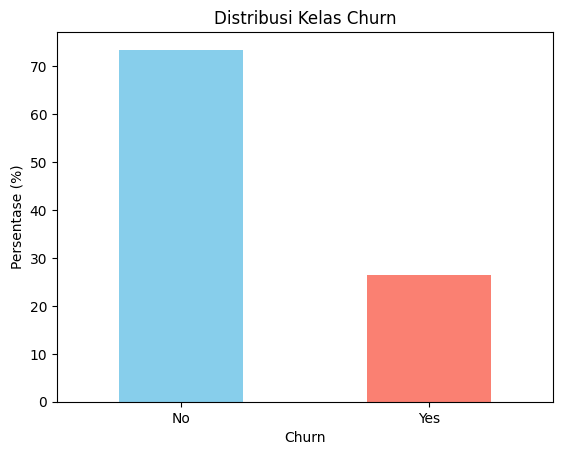

In [99]:
import pandas as pd

# Hitung distribusi kelas
churn_distribution = df['Churn'].value_counts(normalize=True) * 100

# Tampilkan hasil
print("Class Distribution (%):")
print(churn_distribution)

# Visualisasi
import matplotlib.pyplot as plt
churn_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Kelas Churn')
plt.ylabel('Persentase (%)')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

### 🔍 **Insight Data Understanding**

* Dataset terdiri dari **7043 baris dan 21 kolom**

* Kolom `TotalCharges` **secara logika berisi nilai numerik** (jumlah total biaya pelanggan), tetapi bertipe `object`. Oleh karena itu, akan dilakukan konversi tipe data ke `float` dan penanganan missing values (NaN) setelah konversi.

* **Tidak ditemukan nilai duplikat** dalam dataset. Hal ini penting untuk memastikan tidak ada baris data yang secara tidak sengaja menggandakan informasi pelanggan.

* **Kolom `customerID`** bersifat sebagai identifier unik dan tidak mengandung informasi prediktif, sehingga akan **dihapus** dari dataset pada tahap data preparation.

* Untuk memahami keragaman nilai dalam fitur kategorikal seperti `Contract`, `PaymentMethod`, `OnlineBackup`, dan lainnya, dilakukan eksplorasi menggunakan fungsi `value_counts()` agar bisa menentukan label encoding.

* Distribusi target (`Churn`) menunjukkan bahwa dataset **tidak seimbang secara kelas**:

  * Pelanggan yang **tidak churn ("No")** mendominasi sebesar sekitar **73%**
  * Pelanggan yang **churn ("Yes")** hanya sekitar **27%**

##3. Data Preparation  

###3.1 Data Preprocessing

In [100]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [103]:
df.duplicated().sum()

np.int64(0)

In [105]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [106]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df.drop(columns=['customerID'], inplace=True)

In [109]:
# Encode fitur kategorikal
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 2, 'No': 1, 'No phone service': 0})
df['InternetService'] = df['InternetService'].map({'DSL': 2, 'Fiber optic': 1, 'No': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 2, 'No': 1, 'No internet service': 0})
df['Contract'] = df['Contract'].map({'Two year': 2, 'One year': 1, 'Month-to-month': 0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Bank transfer (automatic)':3, 'Credit card (automatic)': 2, 'Mailed check': 1, 'Electronic check': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

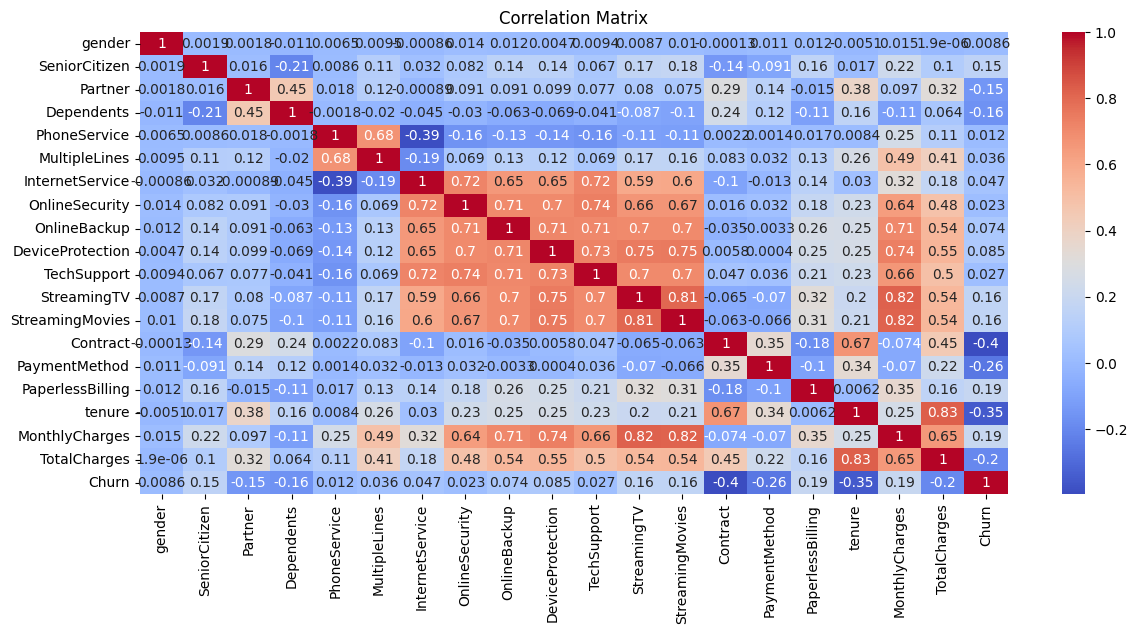

In [135]:
plt.figure(figsize=(14, 6))
sns.heatmap(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'PaperlessBilling',  'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 🛠️ **Insight Data Preparation**

* Kolom `TotalCharges` ditransformasi dari tipe `object` ke `float` menggunakan `pd.to_numeric()` dengan parameter `errors='coerce'`. Akibatnya, sebanyak **11 baris data menjadi `NaN`**.

* Untuk mengatasi nilai `NaN` tersebut, dilakukan proses **handling missing values** dengan cara **mengisi nilai kosong menggunakan median** dari kolom `TotalCharges`.

* Kolom `customerID` dihapus dari dataset menggunakan `df.drop(columns=['customerID'])`, karena merupakan **identifier unik** yang tidak memiliki kontribusi prediktif terhadap model.

* Untuk mempersiapkan data ke tahap pemodelan, dilakukan **encoding pada fitur kategorikal** menggunakan teknik **label encoding**, sehingga seluruh fitur menjadi numerik.
  Fitur yang **tidak di-encode** adalah fitur numerik seperti:

  * `tenure` (durasi langganan)
  * `MonthlyCharges` (biaya bulanan)
  * `TotalCharges` (total biaya)
  * `SeniorCitizen` (sudah dalam bentuk numerik 0/1)

* Proses encoding dilakukan pada semua kolom kategorikal, seperti:

  * `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, dan `PaymentMethod`.

* Setelah proses encoding, dilakukan analisis **matriks korelasi (correlation matrix)** untuk mengetahui hubungan antar fitur. Visualisasi seperti heatmap digunakan untuk mengidentifikasi fitur-fitur yang paling berpengaruh, serta untuk mendeteksi multikolinearitas antar fitur.
Pada grafik ini masih belum bisa terlihat fitur mana yang sangat memengaruhi churn, namun kita bisa melihat fitur yang saling berkaitan dengan kotak yang warnanya paling mendekati merah seperti hubungan antara fitur 'MonthlyCharges' dengan 'StreamingTV' dan 'StreamingFilm' yang memiliki nilai korelasi sebesar 0.82


###3.2 Train-Test Split

In [128]:
X = df[['gender', 'SeniorCitizen', 'Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'PaperlessBilling',  'tenure', 'TotalCharges', 'MonthlyCharges']]
y = df['Churn']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 📊 **Train-Test Split Insight**

Pada tahap ini, dilakukan proses **pemisahan dataset** menjadi data **pelatihan (training)** dan **pengujian (testing)** menggunakan fungsi `train_test_split` dari library `sklearn.model_selection`.

* **Fitur (`X`)** yang digunakan untuk membangun model terdiri dari 19 kolom, yaitu kombinasi dari:

  * Fitur **demografi** (`gender`, `SeniorCitizen`, `Partner`, `Dependents`)
  * Fitur **layanan pelanggan** (`PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`)
  * Fitur **metode pembayaran dan kontrak** (`Contract`, `PaymentMethod`, `PaperlessBilling`)
  * Fitur **numerik** seperti `tenure` (lama berlangganan), `TotalCharges`, dan `MonthlyCharges`.

* **Target (`y`)** adalah kolom `Churn`, yaitu apakah pelanggan berhenti berlangganan (`Yes`) atau tidak (`No`), yang sebelumnya telah diubah ke format biner (`1` untuk churn, `0` untuk tidak churn).

* Dataset dibagi menjadi dua bagian:

  * **80% data digunakan untuk melatih model (`X_train`, `y_train`)**
  * **20% data digunakan untuk menguji performa model (`X_test`, `y_test`)**
  * Parameter `random_state=42` digunakan agar **hasil pembagian data selalu konsisten dan dapat direproduksi** (reproducible).

**Tujuan dari Train-Test Split:**

* Untuk **menghindari overfitting**, model tidak boleh diuji pada data yang sama dengan yang digunakan untuk melatihnya.
* Pembagian ini memungkinkan evaluasi performa model secara obyektif terhadap data yang belum pernah dilihat sebelumnya.


##4. Modeling

###4.1 Pelatihan Model

In [130]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
# Ambil importance dan urutkan
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan hasil
print(feature_importance_df)

             Feature  Importance
17      TotalCharges    0.192779
18    MonthlyCharges    0.175400
16            tenure    0.150929
13          Contract    0.087499
14     PaymentMethod    0.058985
7     OnlineSecurity    0.032495
10       TechSupport    0.029625
0             gender    0.029202
6    InternetService    0.028115
8       OnlineBackup    0.027829
15  PaperlessBilling    0.026628
9   DeviceProtection    0.024708
5      MultipleLines    0.024088
2            Partner    0.023676
12   StreamingMovies    0.022267
3         Dependents    0.020844
11       StreamingTV    0.020643
1      SeniorCitizen    0.019552
4       PhoneService    0.004733


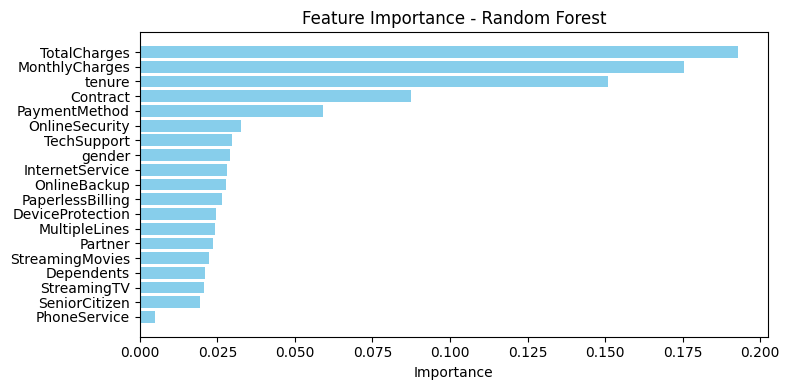

In [126]:
# Visualisasi Feature Importance
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


### 🤖 **Insight Tahap Modeling dan Interpretasi Feature Importance**

Pada tahap ini, dilakukan proses **pelatihan model machine learning** menggunakan algoritma **Random Forest Classifier**, dilanjutkan dengan analisis **feature importance**.

#### 🔷 Pemodelan:

* **Random Forest** adalah algoritma ensemble berbasis **decision tree** yang membangun banyak pohon keputusan (tree) pada subset data dan melakukan agregasi (voting mayoritas) untuk membuat prediksi akhir.
* Random Forest **cocok untuk data campuran** (numerik dan kategorikal yang telah di-encode), tahan terhadap outlier dan cenderung tidak overfitting dibanding decision tree tunggal.
* Parameter `random_state=42` digunakan untuk memastikan model menghasilkan hasil yang **konsisten dan dapat direproduksi**.

#### 📌 Feature Importance:

* Setelah model dilatih, kita dapat mengevaluasi **seberapa besar kontribusi masing-masing fitur** terhadap prediksi churn dengan melihat `feature_importances_`.
* Fitur dengan nilai importance lebih tinggi memiliki **pengaruh lebih besar** terhadap keputusan model.
* Hasil ini dirangkum ke dalam dataframe dan diurutkan menurun, kemudian divisualisasikan dalam bentuk horizontal bar chart.
* Fitur seperti `TotalCharges`, `PaymentMethod`, `Contract`, `tenure`, dan `MonthlyCharges` berada di posisi atas, menunjukkan bahwa:

  * **Biaya total (TotalCharges)** dan **Biaya bulanan (MonthlyCharges)** yang tinggi bisa menjadi faktor risiko churn.
  * **Jenis kontrak** pelanggan (bulanan, tahunan) sangat memengaruhi kemungkinan churn.
  * **Lama berlangganan (tenure)** umumnya memiliki korelasi negatif dengan churn (semakin lama, semakin kecil kemungkinan churn).
  * **Metode pembayaran (PaymentMethod)** model prediksi churn karena metode pembayaran pelanggan dapat merefleksikan preferensi, kebiasaan, dan kemungkinan loyalitas mereka terhadap layanan.

###4.2 Prediksi & Evaluasi

In [131]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 📊 **Hasil Evaluasi:**

| Metrik    | Kelas 0 (No Churn) | Kelas 1 (Churn) |
| --------- | ------------------ | --------------- |
| Precision | 0.83               | 0.66            |
| Recall    | 0.91               | 0.47            |
| F1-Score  | 0.87               | 0.55            |
| Support   | 1036               | 373             |

---

### 📌 **Penjelasan Metrik per Kelas:**

#### 🔹 **Kelas 0 (Tidak Churn):**

* **Precision 0.83:** Dari seluruh prediksi "tidak churn", sebanyak 83% benar.
* **Recall 0.91:** Model berhasil menangkap 91% pelanggan yang memang tidak churn.
* **F1-score 0.87:** Performa keseluruhan untuk kelas mayoritas sangat baik.
* Ini wajar karena kelas 0 adalah **kelas dominan (sekitar 73%)**, sehingga model memiliki cukup data untuk belajar mengenalinya.

#### 🔹 **Kelas 1 (Churn):**

* **Precision 0.66:** Dari semua prediksi "churn", hanya 66% yang benar.
* **Recall 0.47:** Model hanya berhasil menangkap 47% pelanggan yang benar-benar churn.
* **F1-score 0.55:** Menunjukkan bahwa model masih **kesulitan mengenali kelas minoritas (churn)** secara akurat.

---

### 📌 **Akurasi dan Rata-rata:**

* **Accuracy 0.79:** Model secara keseluruhan benar memprediksi 79% data.
* **Macro average:**

  * Rata-rata dari masing-masing kelas tanpa mempertimbangkan proporsi data.
  * **Recall macro hanya 0.69**, menunjukkan bahwa **kelas minoritas tidak dipelajari dengan baik**.
* **Weighted average:**

  * Rata-rata yang mempertimbangkan jumlah sampel per kelas.
  * Nilainya lebih tinggi karena dominasi kelas 0.

---

### 💡 **Insight Bisnis dan Saran Perbaikan:**

Model sangat baik dalam mengenali pelanggan yang **tidak churn**, tetapi kurang mampu mendeteksi pelanggan yang **berisiko churn**.

---

### ✨ Kesimpulan:

Model cukup baik dalam prediksi keseluruhan, tapi performa terhadap **kelas churn masih perlu ditingkatkan** agar benar-benar membantu perusahaan mencegah kehilangan pelanggan.